<a href="https://colab.research.google.com/github/inesfrsantos/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download necessary packages

In [ ]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt') # download the necessary tokenizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords') # download the necessary stop words
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/inesfrsantos/NLP


Cloning into 'NLP'...
remote: Enumerating objects: 11, done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 11
Unpacking objects: 100% (11/11), 67.47 MiB | 8.42 MiB/s, done.


In [ ]:
#Load bumble data
bumble = pd.read_csv('/content/drive/MyDrive/NLP/DataSources/bumble_google_play_reviews.csv')

FileNotFoundError: ignored

In [ ]:
#Load Tinder Data
with zipfile.ZipFile("/content/drive/MyDrive/NLP/DataSources/Tinder_reviews.zip", "r") as zip_ref:
    # Replace "path/to/your/file.csv" with the path to your CSV file within the ZIP archive
    with zip_ref.open("tinder_google_play_reviews.csv") as csv_file:
        # Load the CSV data into a Pandas DataFrame
        tinder = pd.read_csv(csv_file)

# Exploratory Data Analysis

In [ ]:
# Check the bumble data
bumble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129463 entries, 0 to 129462
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              129463 non-null  object
 1   userName              129463 non-null  object
 2   userImage             129463 non-null  object
 3   content               129454 non-null  object
 4   score                 129463 non-null  int64 
 5   thumbsUpCount         129463 non-null  int64 
 6   reviewCreatedVersion  108021 non-null  object
 7   at                    129463 non-null  object
 8   replyContent          84369 non-null   object
 9   repliedAt             84369 non-null   object
 10  appVersion            108021 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.9+ MB


In [ ]:
# Check the tinder data
tinder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584667 entries, 0 to 584666
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              584667 non-null  object
 1   userName              584663 non-null  object
 2   userImage             584667 non-null  object
 3   content               583329 non-null  object
 4   score                 584667 non-null  int64 
 5   thumbsUpCount         584667 non-null  int64 
 6   reviewCreatedVersion  463732 non-null  object
 7   at                    584667 non-null  object
 8   replyContent          47121 non-null   object
 9   repliedAt             47121 non-null   object
 10  appVersion            463732 non-null  object
dtypes: int64(2), object(9)
memory usage: 49.1+ MB


In [ ]:
# Check the first rows of each the bumble data
bumble.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d1b0a0e6-fd75-49a7-89b5-aceb3229b180,Pintu bhai mahla,https://play-lh.googleusercontent.com/a/AGNmyx...,Op level,3,0,5.317.1,2023-04-30 00:53:36,NaN,NaN,5.317.1
1,6f4869a0-2b49-43e9-bb8e-e4451345e29d,Abdul Basit,https://play-lh.googleusercontent.com/a/AGNmyx...,Badoo is way better,1,0,NaN,2023-04-30 00:09:08,NaN,NaN,NaN
2,bd8f6865-5481-4739-915f-d31ba2bb6430,Albert Fuentez,https://play-lh.googleusercontent.com/a/AGNmyx...,Far too many fake accounts and fluff matches i...,2,0,NaN,2023-04-30 00:06:16,NaN,NaN,NaN
3,68886f10-800f-4fd9-b2a1-91051614806f,ehit,https://play-lh.googleusercontent.com/a/AGNmyx...,Not using my right location. I'm traveling and...,1,0,5.317.1,2023-04-29 22:14:03,NaN,NaN,5.317.1
4,8874f001-332c-42fa-ae96-fc738eba8b4a,Christopher,https://play-lh.googleusercontent.com/a/AGNmyx...,Stopped working on my phone all together doesn...,1,0,5.317.1,2023-04-29 21:29:58,NaN,NaN,5.317.1


In [ ]:
#Check the first rows of the tinder data
tinder.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,701f6eba-bd35-4d2e-8812-b7ba889c9204,Ricardo Morales,https://play-lh.googleusercontent.com/a-/ACB-R...,People use tinder to promote their IGs,1,0,14.7.0,2023-05-05 01:05:07,NaN,NaN,14.7.0
1,a551c9d2-d5d6-42df-80dd-3c3c0eb60766,This Man,https://play-lh.googleusercontent.com/a-/ACB-R...,Worst dating app,1,0,NaN,2023-05-05 00:59:39,NaN,NaN,NaN
2,f42dc157-ba8d-4957-820e-d73f1797bf1c,Mehul Shah,https://play-lh.googleusercontent.com/a-/ACB-R...,Good...,5,0,14.7.0,2023-05-05 00:38:48,NaN,NaN,14.7.0
3,9af363bc-d8ce-44b4-baf9-8f038beffe07,Adam Shehata,https://play-lh.googleusercontent.com/a/AGNmyx...,This is actually the worst dating app ever. Tr...,1,0,NaN,2023-05-05 00:34:06,NaN,NaN,NaN
4,e1446b4b-0a87-4822-84f8-5cc406a9a7aa,Miguel Alvarez,https://play-lh.googleusercontent.com/a/AGNmyx...,it's alright,2,0,14.7.0,2023-05-05 00:32:41,NaN,NaN,14.7.0


In [ ]:
# Check missing values
bumble.isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     9
score                       0
thumbsUpCount               0
reviewCreatedVersion    21442
at                          0
replyContent            45094
repliedAt               45094
appVersion              21442
dtype: int64

In [ ]:
# Check missing values
tinder.isnull().sum()

reviewId                     0
userName                     4
userImage                    0
content                   1338
score                        0
thumbsUpCount                0
reviewCreatedVersion    120935
at                           0
replyContent            537546
repliedAt               537546
appVersion              120935
dtype: int64

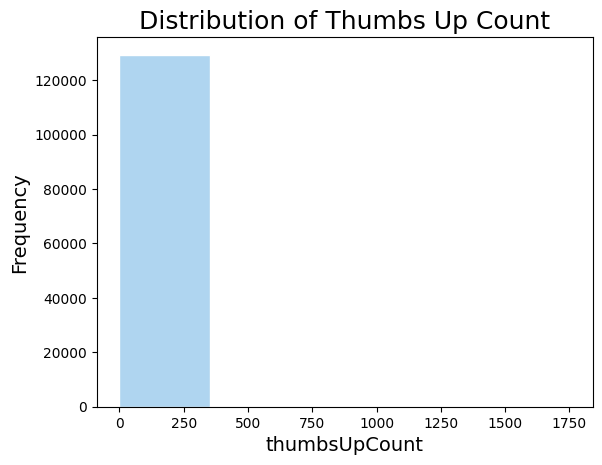

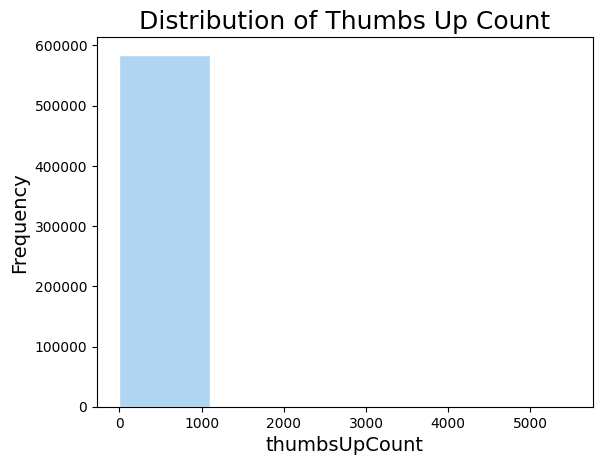

In [ ]:
# Check the distribution of the thumbsupcount variable for bumble
fig, ax = plt.subplots()
ax.hist(bumble["thumbsUpCount"], bins=5, color="#afd5f0", edgecolor="white")
ax.set_xlabel("thumbsUpCount", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Thumbs Up Count", fontsize=18)
plt.show()


# Check the distribution of the thumbsupcount variable for tinder
fig, ax = plt.subplots()
ax.hist(tinder["thumbsUpCount"], bins=5, color="#afd5f0", edgecolor="white")
ax.set_xlabel("thumbsUpCount", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Thumbs Up Count", fontsize=18)
plt.show()

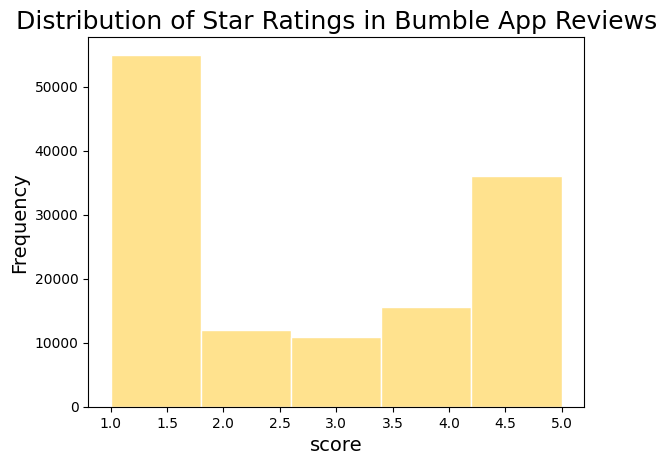

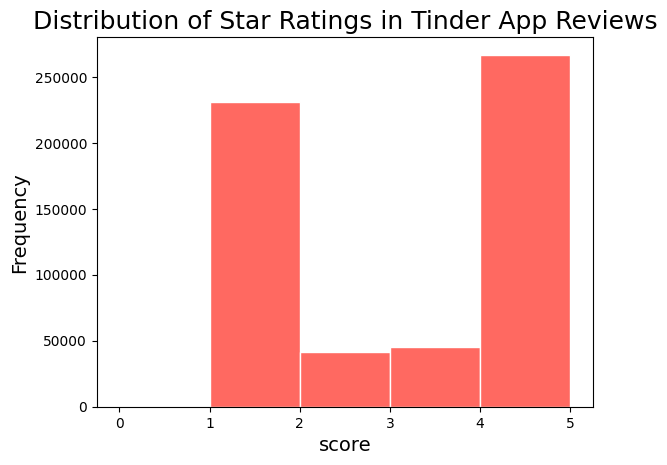

In [ ]:
#Check the distribution of the score
target_col = "score"

# Plot the distribution of the target variable
fig, ax = plt.subplots()
ax.hist(bumble[target_col], bins=5, color="#ffe28e", edgecolor="white")
ax.set_xlabel(target_col, fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Star Ratings in Bumble App Reviews", fontsize=18)
plt.show()

# Plot the distribution of the target variable
fig, ax = plt.subplots()
ax.hist(tinder[target_col], bins=5, color="#ff6961", edgecolor="white")
ax.set_xlabel(target_col, fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Star Ratings in Tinder App Reviews", fontsize=18)
plt.show()

From the analysis above we can see that both datasets have the same number of columns and the same column names. Hence we will be merging the datasets. 

Furthermore as the most important column in our analysis is the "content", which contains the text to be analysed, we will be removing the rows that have null values for it, and the columns that will not be used. 

Additionally, some formatting in the tables will be conducted as well, such as lowering column names and other pre-processing needed before doing our modelling. 

# Pre-Processing

In [ ]:
# Create a new column called "app" and set its values to Bumble and Tinder so we classify it
bumble["app"] = "Bumble"
tinder["app"] = "Tinder"


In [ ]:
# Concatenate the two datasets
app_reviews = pd.concat([bumble, tinder])

In [ ]:
# Drop the null values for the content column
app_reviews = app_reviews.dropna(subset=['content'])

In [ ]:
# Remove columns that are not needed
#Select columns
columns_to_remove = ["reviewcreatedversion", "at", "replycontent", "repliedat", "appversion", "userimage", "thumbsupcount"

# Drop the specified columns
app_reviews = app_reviews.drop(columns_to_remove, axis=1)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-8367e5b7aa27>", line 6, in <cell line: 6>
    app_reviews = app_reviews.drop(columns_to_remove, axis=1)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 5399, in drop
    return super().drop(
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 4505, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 4546, in _drop_axis
    new_axis = axis.drop(labels, errors=e

In [ ]:
# Lowercase all column names and remove extra whitespaces
app_reviews.columns = app_reviews.columns.map(str.lower).map(str.strip)

In [ ]:
#Set index
app_reviews.set_index('reviewid', inplace=True)


In [ ]:
# Define a function to clean text
def clean_text(text):
    clean_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return clean_text

# Apply the clean_text function to the content column
app_reviews['content'] = app_reviews['content'].apply(clean_text)

In [ ]:
# create a new column 'tokens' by tokenizing the 'text' column
app_reviews['tokens'] = app_reviews['content'].apply(nltk.word_tokenize)

# convert all tokens to lowercase
app_reviews['tokens'] = app_reviews['tokens'].apply(lambda x: [word.lower() for word in x])


In [ ]:
# create a set of stop words
stop_words = set(stopwords.words('english'))

# remove stop words from the 'tokens' column
app_reviews['tokens'] = app_reviews['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
#Perform Stemming and Lemmatization 
stemmer  = PorterStemmer() # for stemming
lemmatizer  = WordNetLemmatizer() # for lemmatization

In [ ]:
# Define a function to apply stemming to a list of tokens
def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Define a function to apply lemmatization to a list of tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [ ]:
# Apply stemming to a column of tokens in a dataframe
app_reviews['stemmed_tokens'] = app_reviews['tokens'].apply(stem_tokens)

# Apply lemmatization to a column of tokens in a dataframe
app_reviews['lemmatized_tokens'] = app_reviews['tokens'].apply(lemmatize_tokens)

In [ ]:
# Initialize a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the pre-processed text data into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(app_reviews['tokens'].apply(lambda x: ' '.join(x)))

# Get the feature names
feature_names = tfidf_vectorizer.vocabulary_.keys()

# Print the TF-IDF matrix
print(tfidf_matrix)
print(feature_names)

  (0, 62366)	0.633579481611739
  (0, 77507)	0.7736776075863901
  (1, 16888)	0.4533548742134172
  (1, 117229)	0.42940310185561575
  (1, 14677)	0.7810776748465623
  (2, 113816)	0.0939553589879534
  (2, 97059)	0.17867976286024387
  (2, 82206)	0.13595030048158427
  (2, 102519)	0.2904110523185702
  (2, 15601)	0.17182375822440343
  (2, 85924)	0.10645232665220089
  (2, 97062)	0.21050533675328337
  (2, 53022)	0.20551647986669708
  (2, 76424)	0.15674077798147878
  (2, 28612)	0.18160564715724978
  (2, 65796)	0.17238897511733078
  (2, 84816)	0.20655456300089706
  (2, 68572)	0.11198870732241707
  (2, 119269)	0.10431034644941437
  (2, 121186)	0.1296214935867524
  (2, 96103)	0.1289683698314541
  (2, 106932)	0.18799064371924715
  (2, 102687)	0.35095619830642544
  (2, 59390)	0.24362790235524845
  (2, 77972)	0.16647329529911972
  :	:
  (712779, 85182)	0.28477899048429883
  (712779, 20174)	0.23067849114250585
  (712779, 17976)	0.26527073532615636
  (712779, 95186)	0.20682266978669786
  (712779, 27701)	0

## LDA specific preprocessing

In [ ]:
# Define stopwords, punctuations, and lemmatizer
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
lemmatizer = WordNetLemmatizer()


def filter_tokens(token_list):
    # Define stopwords, punctuations, and lemmatizer
    stop_words = set(stopwords.words('english'))
    punctuations = set(string.punctuation)
    lemmatizer = WordNetLemmatizer()

    # Remove words that are too rare or too common
    texts = [[word for word in document if word not in stop_words and word not in punctuations] for document in token_list]
    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_below=5, no_above=0.7)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    return corpus, dictionary

# Sentiment Analysis specific preprocessing

In [ ]:
# Sentiment-specific preprocessing

# Emoticon handling
emoticons = {
    ':-)': 'smile',
    ':)': 'smile',
    ';)': 'wink',
    ':(': 'sad',
    ':/': 'confused',
    ':|': 'neutral',
    ':D': 'laugh',
    ':P': 'tongue'
}


# Handling of slang words and abbreviations
slang_dict = {
    'u': 'you',
    'r': 'are',
    'luv': 'love',
    'gr8': 'great',
    'lol': 'laugh out loud',
    'np': 'no problem'
}

# Define sentiment-specific preprocessing
def preprocess_sentiment(tokens):
    negated = False
    result = []
    for word in tokens:
        if any(neg in word for neg in ['not', 'n\'t', 'no']):
            negated = not negated
        elif negated and word not in punctuations:
            word = 'not_' + word
        word = emoticons.get(word, word)
        word = slang_dict.get(word, word)
        result.append(word)
    return result

# Create a column for each

In [ ]:
# Apply LDA-specific preprocessing on the tokenized data
app_reviews['tokens_lda'] = app_reviews['tokens'].apply(filter_tokens)

# Apply sentiment-specific preprocessing on the tokenized data
app_reviews['tokens_sentiment'] = app_reviews['tokens'].apply(preprocess_sentiment)

In [ ]:
app_reviews.head()

,username,content,score,app,tokens,stemmed_tokens,lemmatized_tokens,tokens_lda,tokens_sentiment
reviewid,,,,,,,,,
d1b0a0e6-fd75-49a7-89b5-aceb3229b180,Pintu bhai mahla,Op level,3,Bumble,"[op, level]","[op, level]","[op, level]","([[], []], ())","[op, level]"
6f4869a0-2b49-43e9-bb8e-e4451345e29d,Abdul Basit,Badoo is way better,1,Bumble,"[badoo, way, better]","[badoo, way, better]","[badoo, way, better]","([[], [], []], ())","[badoo, way, better]"
bd8f6865-5481-4739-915f-d31ba2bb6430,Albert Fuentez,Far too many fake accounts and fluff matches i...,2,Bumble,"[far, many, fake, accounts, fluff, matches, or...","[far, mani, fake, account, fluff, match, order...","[far, many, fake, account, fluff, match, order...","([[(0, 1), (1, 1)], [(2, 1)], [(0, 1)], [(2, 1...","[far, many, fake, accounts, fluff, matches, or..."
68886f10-800f-4fd9-b2a1-91051614806f,ehit,Not using my right location Im traveling and i...,1,Bumble,"[using, right, location, im, traveling, refuse...","[use, right, locat, im, travel, refus, updat, ...","[using, right, location, im, traveling, refuse...","([[(0, 1), (1, 1)], [(0, 1), (2, 1)], [(1, 1),...","[using, right, location, im, traveling, refuse..."
8874f001-332c-42fa-ae96-fc738eba8b4a,Christopher,Stopped working on my phone all together doesn...,1,Bumble,"[stopped, working, phone, together, doesnt, ev...","[stop, work, phone, togeth, doesnt, even, let,...","[stopped, working, phone, together, doesnt, ev...","([[], [(0, 1)], [(0, 1)], [], [(0, 1)], [(0, 1...","[stopped, working, phone, together, doesnt, ev..."
